In [58]:
import matplotlib
import mne
import os
from mne_bids import (write_raw_bids, BIDSPath,
                      read_raw_bids, print_dir_tree)

In [80]:
bids_root = os.path.join('data', 'P3')
bids_path = BIDSPath(subject='001',
                     session='P3', task='P3', datatype='eeg', suffix='eeg', root=bids_root)

In [60]:
raw = mne.io.read_raw_eeglab('data/p3/sub-001/ses-P3/eeg/sub-001_ses-P3_task-P3_eeg.set')

Reading /Users/ssaurabh/Projects/eeg-p300-pipeline/data/p3/sub-001/ses-P3/eeg/sub-001_ses-P3_task-P3_eeg.fdt
<ipython-input-60-bfd7d68e37c8>:1: RuntimeWarning: Data file name in EEG.data (sub-001_task-P3_eeg.fdt) is incorrect, the file name must have changed on disk, using the correct file name (sub-001_ses-P3_task-P3_eeg.fdt).
  raw = mne.io.read_raw_eeglab('data/p3/sub-001/ses-P3/eeg/sub-001_ses-P3_task-P3_eeg.set')


In [81]:
bids_path

BIDSPath(
root: data/P3
datatype: eeg
basename: sub-001_ses-P3_task-P3_eeg)

In [82]:
raw

<RawEEGLAB | sub-001_ses-P3_task-P3_eeg.fdt, 33 x 478208 (467.0 s), ~120.4 MB, data loaded>

In [83]:
print_dir_tree(bids_root)

|P3/
|--- .DS_Store
|--- task-P3_events.json
|--- sub-001/
|------ ses-P3/
|--------- eeg/
|------------ sub-001_ses-P3_task-P3_badChannels.tsv
|------------ sub-001_ses-P3_task-P3_badSegments.csv
|------------ sub-001_ses-P3_task-P3_channels.tsv
|------------ sub-001_ses-P3_task-P3_eeg.fdt
|------------ sub-001_ses-P3_task-P3_eeg.json
|------------ sub-001_ses-P3_task-P3_eeg.set
|------------ sub-001_ses-P3_task-P3_events.tsv
|------------ sub-001_ses-P3_task-P3_ica.set
|------------ sub-001_ses-P3_task-P3_ica.tsv
|--- sub-002/
|------ ses-P3/
|--------- eeg/
|------------ sub-002_ses-P3_task-P3_badChannels.tsv
|------------ sub-002_ses-P3_task-P3_badSegments.csv
|------------ sub-002_ses-P3_task-P3_channels.tsv
|------------ sub-002_ses-P3_task-P3_eeg.fdt
|------------ sub-002_ses-P3_task-P3_eeg.json
|------------ sub-002_ses-P3_task-P3_eeg.set
|------------ sub-002_ses-P3_task-P3_events.tsv
|------------ sub-002_ses-P3_task-P3_ica.set
|------------ sub-002_ses-P3_task-P3_ica.tsv
|--

In [84]:
raw = read_raw_bids(bids_path=bids_path)

Reading /Users/ssaurabh/Projects/eeg-p300-pipeline/data/P3/sub-001/ses-P3/eeg/sub-001_ses-P3_task-P3_eeg.fdt
Reading events from data/P3/sub-001/ses-P3/eeg/sub-001_ses-P3_task-P3_events.tsv.
The event "response" refers to multiple event values. Creating hierarchical event names.
    Renaming event: response -> response/202
    Renaming event: response -> response/202
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201


In [85]:
raw

<RawEEGLAB | sub-001_ses-P3_task-P3_eeg.fdt, 33 x 478208 (467.0 s), ~36 kB, data not loaded>

In [86]:
events, event_id = mne.events_from_annotations(raw)

Used Annotations descriptions: ['response/201', 'response/202', 'stimulus/11', 'stimulus/12', 'stimulus/13', 'stimulus/14', 'stimulus/15', 'stimulus/21', 'stimulus/22', 'stimulus/23', 'stimulus/24', 'stimulus/25', 'stimulus/31', 'stimulus/32', 'stimulus/33', 'stimulus/34', 'stimulus/35', 'stimulus/41', 'stimulus/42', 'stimulus/43', 'stimulus/44', 'stimulus/45', 'stimulus/51', 'stimulus/52', 'stimulus/53', 'stimulus/54', 'stimulus/55']


In [87]:
event_id

{'response/201': 1,
 'response/202': 2,
 'stimulus/11': 3,
 'stimulus/12': 4,
 'stimulus/13': 5,
 'stimulus/14': 6,
 'stimulus/15': 7,
 'stimulus/21': 8,
 'stimulus/22': 9,
 'stimulus/23': 10,
 'stimulus/24': 11,
 'stimulus/25': 12,
 'stimulus/31': 13,
 'stimulus/32': 14,
 'stimulus/33': 15,
 'stimulus/34': 16,
 'stimulus/35': 17,
 'stimulus/41': 18,
 'stimulus/42': 19,
 'stimulus/43': 20,
 'stimulus/44': 21,
 'stimulus/45': 22,
 'stimulus/51': 23,
 'stimulus/52': 24,
 'stimulus/53': 25,
 'stimulus/54': 26,
 'stimulus/55': 27}

In [74]:
%matplotlib inline

In [88]:
raw.load_data()

Reading 0 ... 478207  =      0.000 ...   466.999 secs...


<RawEEGLAB | sub-001_ses-P3_task-P3_eeg.fdt, 33 x 478208 (467.0 s), ~120.4 MB, data loaded>

In [77]:
raw.load_bad_channels()

In [79]:
raw.info['bads']

[]

In [89]:
tmin, tmax = 0, 20  # use the first 20s of data
raw.crop(tmin, tmax).load_data()

<RawEEGLAB | sub-001_ses-P3_task-P3_eeg.fdt, 33 x 20481 (20.0 s), ~5.2 MB, data loaded>

Effective window size : 2.000 (s)
/opt/anaconda3/envs/eeg-pipeline/lib/python3.9/site-packages/mne/utils/docs.py:2748: DeprecationWarning: Function read_vectorview_selection is deprecated; read_selection has been deprecated in favor of read_vectorview_selection and will be removed in 0.24.
  warnings.warn(msg, category=DeprecationWarning)
<ipython-input-93-dee7f3202b15>:10: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd(area_mode='range', tmax=10.0, picks=picks, average=False)


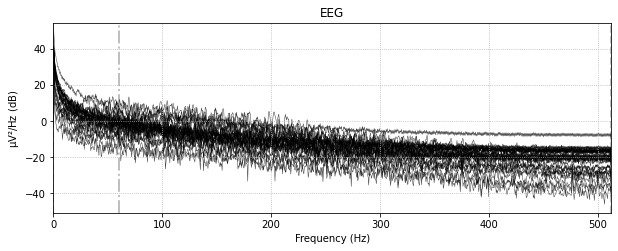

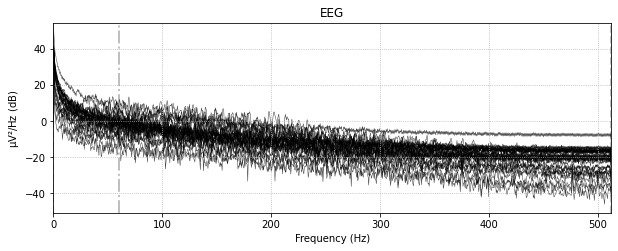

In [93]:
fmin, fmax = 2, 300  # look at frequencies between 2 and 300Hz
n_fft = 2048  # the FFT size (n_fft). Ideally a power of 2

# Pick a subset of channels (here for speed reason)
selection = mne.read_selection('Left-temporal')
picks = mne.pick_types(raw.info, eeg=True, eog=False,
                       stim=False, exclude='bads')

# Let's first check out all channel types
raw.plot_psd(area_mode='range', tmax=10.0, picks=picks, average=False)

Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 6759 samples (6.601 sec)

Effective window size : 2.000 (s)
<ipython-input-95-d27a23cda376>:4: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd(area_mode='range', tmax=10.0, picks=picks, average=False)


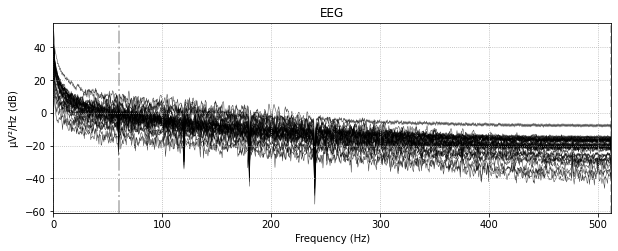

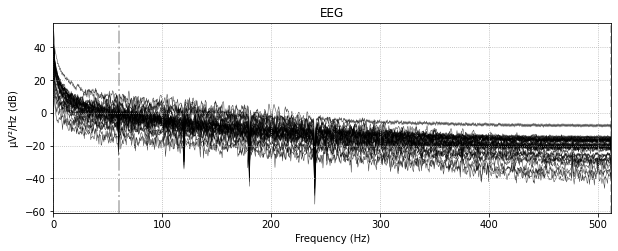

In [95]:
import numpy as np
raw.notch_filter(np.arange(60, 241, 60), picks=picks, filter_length='auto',
                 phase='zero')
raw.plot_psd(area_mode='range', tmax=10.0, picks=picks, average=False)

Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 271 samples (0.265 sec)

Effective window size : 2.000 (s)
<ipython-input-96-35373a162030>:2: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd(area_mode='range', tmax=10.0, picks=picks, average=False)


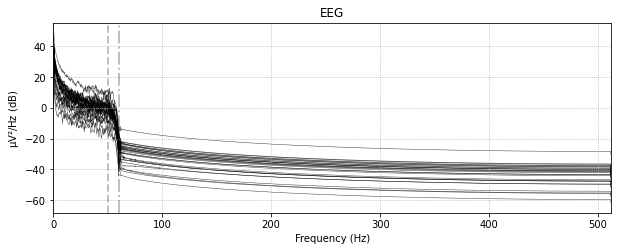

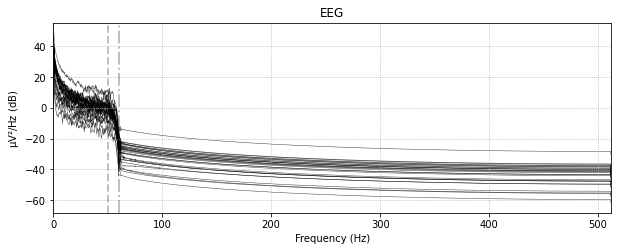

In [96]:
raw.filter(None, 50., fir_design='firwin')
raw.plot_psd(area_mode='range', tmax=10.0, picks=picks, average=False)